# PART 5: SpaceX Data Analysis using PANDAS 


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


Importing the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the SpaceX dataset into a Pandas dataframe 


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


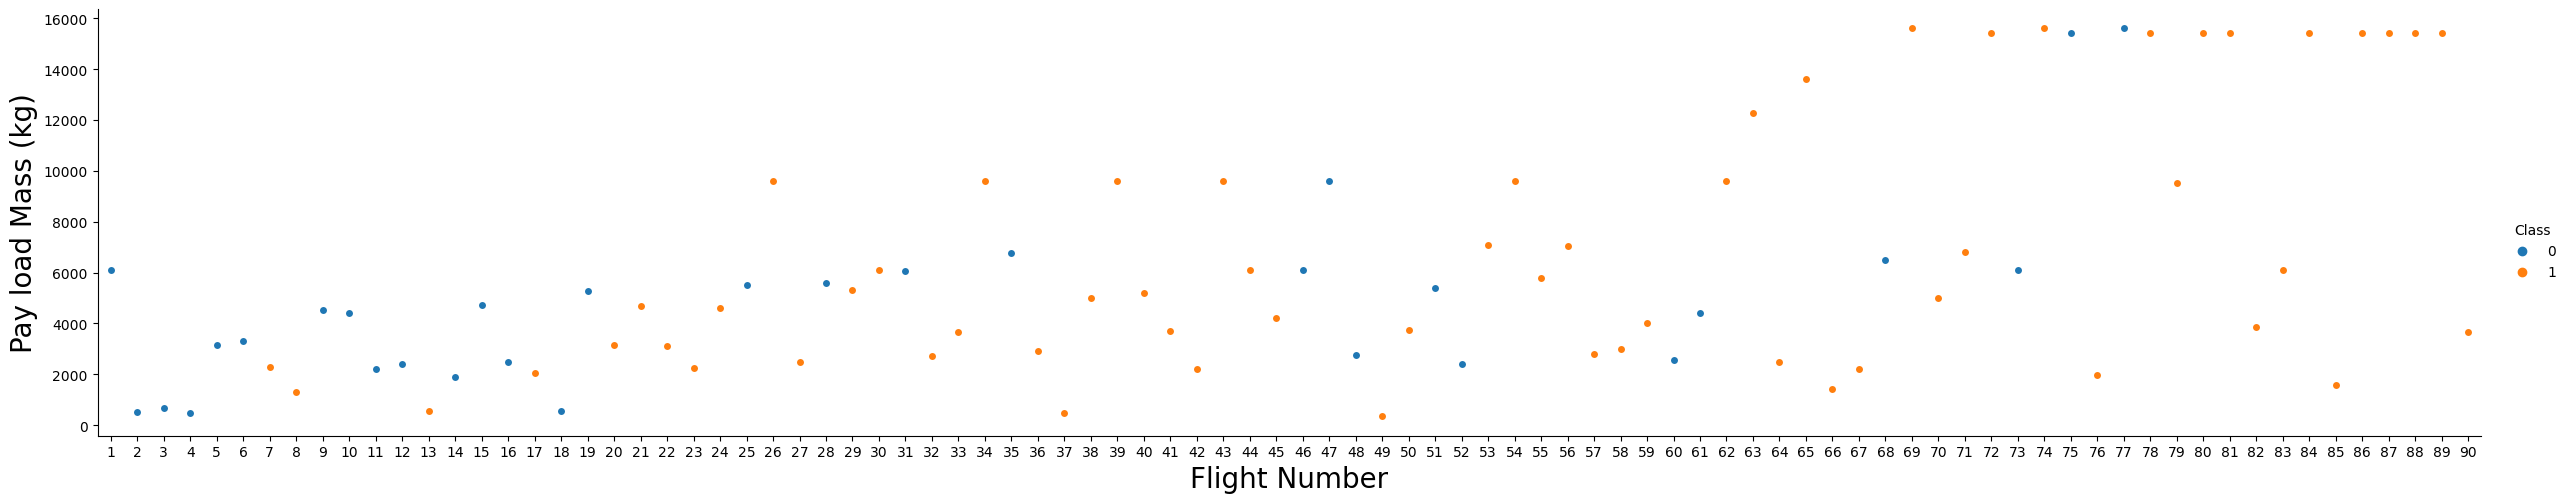

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### 1 Visualize the relationship between Flight Number and Launch Site


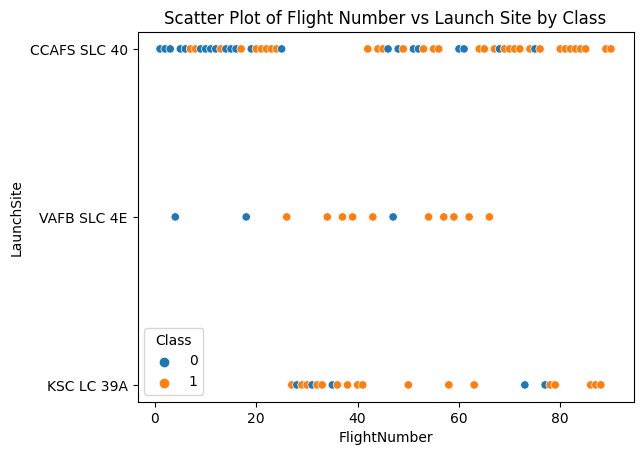

In [7]:
sns.scatterplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    data=df
)

plt.title("Scatter Plot of Flight Number vs Launch Site by Class")
plt.show()

All 3 launch sites success rate increases as flight number inreases

### 2 Visualizing the relationship between Payload and Launch Site


In [ ]:
# Creating a scatter plot with hue class
sns.catplot(
    x = "FlightNumber",
    y = "LaunchSite",
    hue = "Class",
    data = df
)

plt.title("Scatter Plot of Flight Number vs Launch Site by Class")
plt.show()


Observing if there is any relationship between launch sites and payload mass


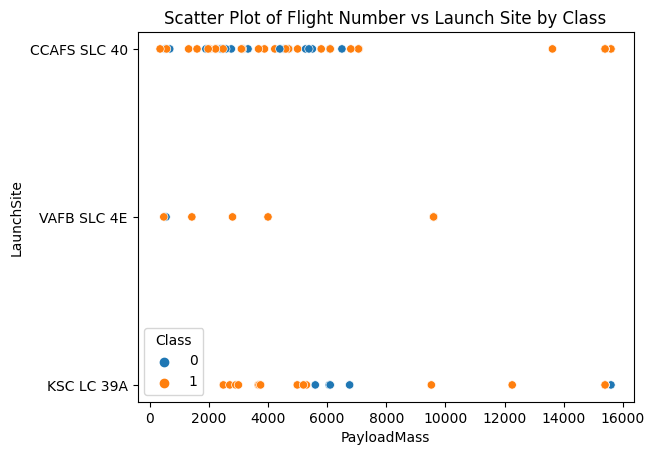

In [8]:
sns.scatterplot(
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    data=df
)

plt.title("Scatter Plot of Flight Number vs Launch Site by Class")
plt.show()

In the Payload Vs. Launch Site scatter point chart, for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### 3 Visualizing the relationship between success rate (mean of class column) of each orbit and plotting bar chart


<ipython-input-14-48520e58d684>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


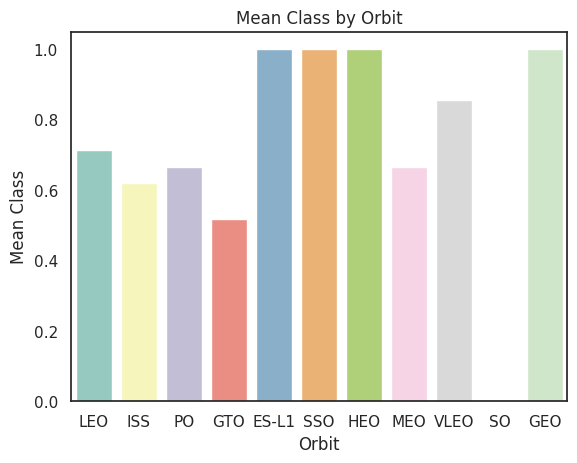

In [14]:
 # Set the style of the plot
sns.set(style="white") 

# Creating the grouped barplot
sns.barplot(
    x="Orbit",  
    y="Class",  
    data=df,    
    estimator=lambda x: x.mean(),  
    ci=None,     
    palette="Set3"  
)

plt.title("Mean Class by Orbit")
plt.xlabel("Orbit")
plt.ylabel("Mean Class")
plt.show()

The orbits with the ES-L1, SSO, HEO, and GEO have the highest success rates

### 4 Visualizing the relationship between FlightNumber and Orbit type


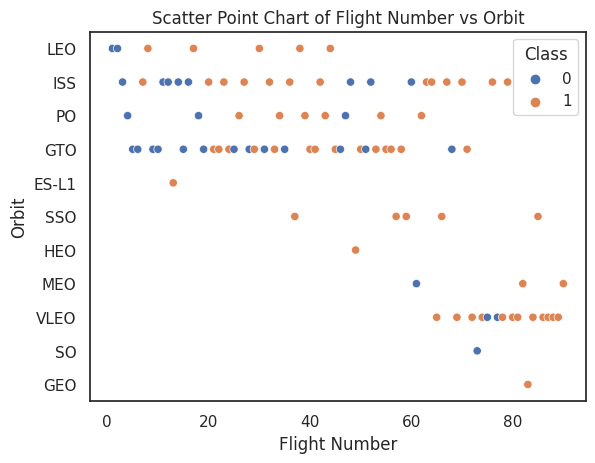

In [15]:
sns.scatterplot(
    x="FlightNumber",  
    y="Orbit",        
    hue="Class",       
    data=df            
)

plt.title("Scatter Point Chart of Flight Number vs Orbit")
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.legend(title="Class")  
plt.show()

In the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### 5 Visualizing the relationship between Payload and Orbit type


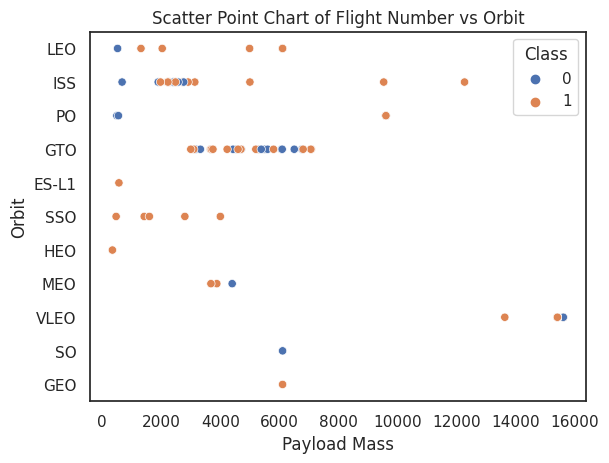

In [16]:
sns.scatterplot(
    x="PayloadMass",  
    y="Orbit",        
    hue="Class",       
    data=df            
)

plt.title("Scatter Point Chart of Flight Number vs Orbit")
plt.xlabel("Payload Mass")
plt.ylabel("Orbit")
plt.legend(title="Class")  
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### 6 Visualizing the launch success yearly trend


In [17]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


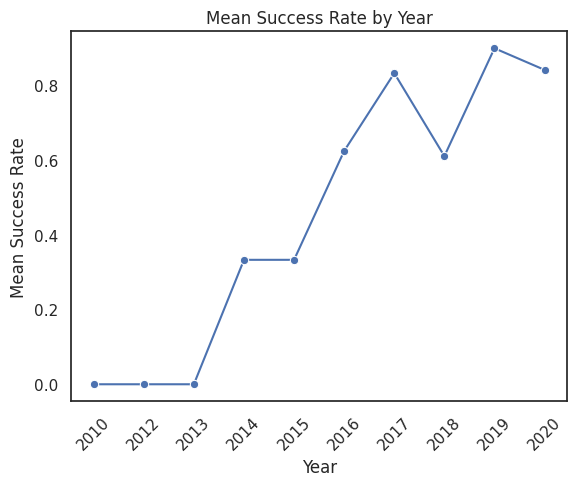

In [19]:
# Calculating the mean success rate for each year
success_rate_by_year = df.groupby('Date')['Class'].mean()

# Setting the style of the plot
sns.set(style="white")

# Creating the line chart
sns.lineplot(
    x=success_rate_by_year.index,   # X-axis: years
    y=success_rate_by_year.values,  # Y-axis: mean success rate
    marker="o"  # Use markers for data points
)

plt.title("Mean Success Rate by Year")
plt.xlabel("Year")
plt.ylabel("Mean Success Rate")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

We observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


We have obtained some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction.


In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### 7 Creating dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [25]:
# Applying one-hot encoding using get_dummies to the specified columns in the df DataFrame
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the results
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 8 Casting all numeric columns to float64


Casting the entire dataframe to variable type <code>float64</code>


In [26]:
features_one_hot = features_one_hot.astype('float64')

In [27]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

Exporting to a CSV file


In [28]:
features_one_hot.to_csv('dataset_part\_3.csv', index=False)
